In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import datetime

In [10]:
def open_and_split(fileName, starting_index):
    dummy = open(fileName, "r")
    length = len(dummy.readlines()) - 1
    dummy.close()
    
    file = open(fileName, "r")
    data = [next(file) for _ in range(length)]
    file.close()

    #divide linens and split the data
    data = [data[i].replace("\n", "") for i in range(len(data))]
    data = [data[i].split() for i in range(len(data))]
    
    #delete first row
    print(f"deleted rows: {data[0]}")
    data = data[starting_index:]
    print(type(data))
    
    return data

#function that filter year
def filter_year(DataFrame, year):
    condition = DataFrame["Year"] == year
    return DataFrame.where(condition).dropna().reset_index().drop("index", axis = 1).drop("Year", axis=1)

#convert Day-Hour to composite
def D_to_C(DataFrame):
    composite = [int(DataFrame["Day"][i]) * 24 + int(DataFrame["Hour"][i]) for i in range(DataFrame.shape[0])]
    
    new = DataFrame.copy()
    new.insert(0, "Time", composite)
    new = new.drop(["Day", "Hour"], axis = 1)
    
    return new

#DLL file with specific columns with conversion of hr:mm to hr
def dll_convert(DataFrame):
    converted = [[int(DataFrame[i][1]), int(DataFrame[i][2][:2]), float(DataFrame[i][6])] for i in range(len(DataFrame))]
    return converted

def standard_units(DataFrame):
    mean_E1 = DataFrame["E"].mean()
    std_E1 = np.std(DataFrame["E"])
    mean_DLL = DataFrame["DLL"].mean()
    std_DLL = np.std(DataFrame["DLL"])
    
    std1 = [((DataFrame["E"][i] - mean_E1) / std_E1) for i in range(len(DataFrame))]
    std2 = [((DataFrame["DLL"][i] - mean_DLL) / std_DLL) for i in range(len(DataFrame))]
    
    return pd.DataFrame({"E STD": std1, "DLL STD": std2})

def correlation_coefficient(dataframe):
    return np.mean(dataframe["E STD"] * dataframe["DLL STD"])

In [11]:
dll_row = open_and_split("DLL_zenodo_1995_T1h.txt", 21)
dll_row_selected = dll_convert(dll_row)

dll = pd.DataFrame(dll_row_selected, columns=["Day", "Hour", "DLL"])
dll = D_to_C(dll)

grouped_dll = dll.groupby("Time").mean()

deleted rows: ['****************************************************************************************']
<class 'list'>


In [12]:
E_row = open_and_split("1995 Flow Speed E.lst", 0)

deleted rows: ['1995', '1', '0', '0', '99999.9', '26']
<class 'list'>


In [23]:
selected_data_row = [[int(E_row[i][1]), int(E_row[i][2]), float(E_row[i][4])] for i in range(len(E_row))]
selected_data_row

[[1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 311.4],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 99999.9],
 [1, 0, 9999

In [26]:
selected_data = []
for i in range(len(E_row)):
    if selected_data_row[i][2] != 99999.9:
        selected_data.append(selected_data_row[i])
selected_data

[[1, 0, 311.4],
 [1, 0, 313.1],
 [1, 0, 312.8],
 [1, 1, 312.7],
 [1, 1, 313.8],
 [1, 1, 313.1],
 [1, 1, 312.6],
 [1, 1, 313.5],
 [1, 1, 313.5],
 [1, 1, 314.4],
 [1, 1, 313.4],
 [1, 1, 313.4],
 [1, 1, 313.1],
 [1, 1, 314.2],
 [1, 1, 315.9],
 [1, 1, 314.6],
 [1, 1, 314.6],
 [1, 1, 313.1],
 [1, 1, 312.8],
 [1, 1, 313.1],
 [1, 1, 314.9],
 [1, 1, 314.9],
 [1, 1, 314.7],
 [1, 1, 314.5],
 [1, 1, 314.5],
 [1, 1, 316.5],
 [1, 1, 315.4],
 [1, 1, 315.3],
 [1, 1, 315.7],
 [1, 1, 315.2],
 [1, 1, 314.4],
 [1, 1, 312.7],
 [1, 1, 315.2],
 [1, 1, 315.2],
 [1, 1, 313.1],
 [1, 1, 311.7],
 [1, 2, 313.5],
 [1, 2, 312.8],
 [1, 2, 313.5],
 [1, 2, 314.5],
 [1, 2, 313.5],
 [1, 2, 314.8],
 [1, 2, 315.7],
 [1, 2, 315.7],
 [1, 2, 314.7],
 [1, 2, 313.0],
 [1, 2, 313.2],
 [1, 2, 310.6],
 [1, 2, 308.5],
 [1, 2, 310.9],
 [1, 2, 310.9],
 [1, 2, 319.5],
 [1, 2, 319.5],
 [1, 2, 318.7],
 [1, 2, 318.7],
 [1, 2, 317.3],
 [1, 2, 316.9],
 [1, 2, 317.8],
 [1, 2, 316.2],
 [1, 2, 321.2],
 [1, 2, 323.2],
 [1, 3, 323.3],
 [1, 3, 

In [27]:
E_data = pd.DataFrame(selected_data, columns = ["Day", "Hour", "E"])
E_data

,Day,Hour,E
0,1,0,311.4
1,1,0,313.1
2,1,0,312.8
3,1,1,312.7
4,1,1,313.8
...,...,...,...
406340,365,23,425.1
406341,365,23,425.9
406342,365,23,430.6
406343,365,23,430.6


In [28]:
E = D_to_C(E_data).groupby("Time").mean()
E

,E
Time,
24,312.433333
25,314.112121
26,315.392000
27,314.170968
28,310.691667
...,...
8779,477.317241
8780,453.842105
8781,441.146667


In [29]:
combined = pd.merge(left=E, right=grouped_dll, left_on="Time", right_on="Time").reset_index()
combined

,Time,E,DLL
0,28,310.691667,-9.117692
1,30,318.174000,-9.576429
2,31,322.352632,-8.836842
3,32,322.705085,-8.737458
4,35,321.362791,-7.578333
...,...,...,...
7854,8779,477.317241,-7.786724
7855,8780,453.842105,-8.430000
7856,8781,441.146667,-8.360167
7857,8782,442.729630,-8.144444


In [30]:
std = standard_units(combined)
std

,E STD,DLL STD
0,-1.080327,-1.143917
1,-1.011596,-1.788291
2,-0.973212,-0.749415
3,-0.969975,-0.609812
4,-0.982305,1.018377
...,...,...
7854,0.450254,0.725656
7855,0.234617,-0.177935
7856,0.118000,-0.079842
7857,0.132540,0.223177


In [31]:
val = correlation_coefficient(std)
val

0.1914295374492215

Text(0.5, 0.98, 'E vs DLL')

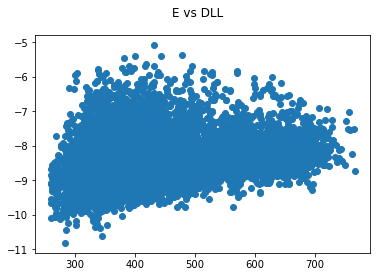

In [32]:
plt.scatter("E", "DLL", data = combined)
plt.suptitle("E vs DLL")

Text(0.5, 0.98, 'E STD vs DLL STD')

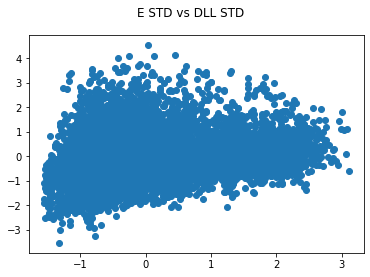

In [33]:
plt.scatter("E STD", "DLL STD", data=std)
plt.suptitle("E STD vs DLL STD")

In [ ]:
#log(E)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=28a83fbe-9ed8-4ad0-ab71-9db262ace005' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>